# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)
print(sns.__version__)

1.25.2
1.5.3
3.7.1
0.13.1


### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Write your code here to read the data
df1=pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows
df1.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
print('The number of rows are:', df1.shape[0], 'and the columns are', df1.shape[1])

The number of rows are: 1898 and the columns are 9


#### Observations:
The two values for the shape [0] rows and [1] columns directly relate to the 2d nature of the pandas workflow which uses the DataFrame structure. This allows for easy intergration and usage of the system and data tools.

---



### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
print('Data Types:\n')
print(df1.dtypes)

Data Types:

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object


#### Observations:
This allows for another easy view of the data set. Using the tools in the panda library along with the python basics we have learned allows us to see four "objects" in the data types. This will make it difficult to work with the data and we will have to investigate. This will lead to validation as well as cleaning the data for usage.

---


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df1.replace('Not given', np.nan, inplace=True)

print('\nMissing Values:')
df1.isnull().sum()


Missing Values:


,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,736
food_preparation_time,0
delivery_time,0


In [ ]:
df1['rating'] = pd.to_numeric(df1['rating'], errors='coerce')
mean_rating = df1['rating'].mean()
df1['rating'].fillna(mean_rating, inplace=True)

print("Missing values after imputation:\n")
print(df1['rating'].isnull().sum())
print(f"\nMean rating used for imputation: {round(mean_rating, 2)}")

Missing values after imputation:

0

Mean rating used for imputation: 4.34


#### Observations:
Initally there was no missing values, but upon looking over the data again I discovered that there was a "rating" column that showed "Not given" values. This counts as not having data but would not be seen as such by the df1.isnull().sum() so I used imputation. Using pd.to_numeric I changed the all the values of the strings to NaN with errors='coerce' to ensure just invalid values become NaN. Then calculated the mean average using of the 'rating' column using .mean() and applied it to the NaN values on the column with the df1['rating'].fillna using the inplace=True to ensure that it will not need a new variable. I created a print line to display what the actual number of 'Not given' values are left and show 0 which confirmed that the code worked. Finally I created the round(mean_rating, 2) line to display the exact average by .00 value used in the imputaion of this EDA.

---


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df1['food_preparation_time'].describe()

,food_preparation_time
count,1898.00
mean,27.37
std,4.63
min,20.00
25%,23.00
50%,27.00
75%,31.00
max,35.00


#### Observations:
The minimum time is 20 with a maximum time of 35 minutes. The average is 27.37 which falls right at the 50% percentile with a standard diviation of 4.63 accounting for IQR.

| Percentile | Time |
|------------|------|
|0% (Min)    |20    |
|25%         |23    |
|50% (Median)|27    |
|57%         |31    |
|100% (Max)  |35    |


  ---


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
df1['rating'].isnull().sum()
print(f"{df1['rating'].isnull().sum()} orders are not rated")

0 orders are not rated


#### Observations:
This is only after running the imputation to so that the "Not given" values have been replaced with the average rating to ensure performing the EDA with stability.

---


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

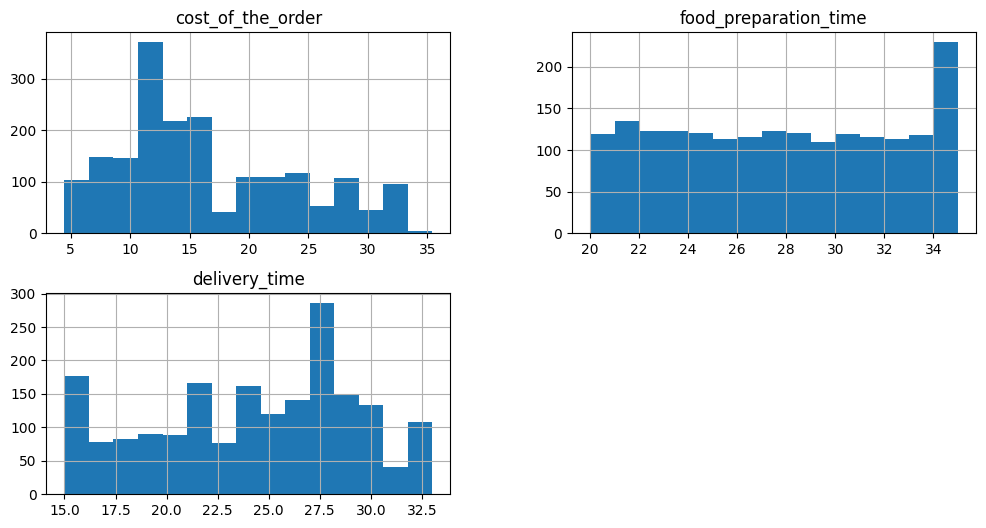

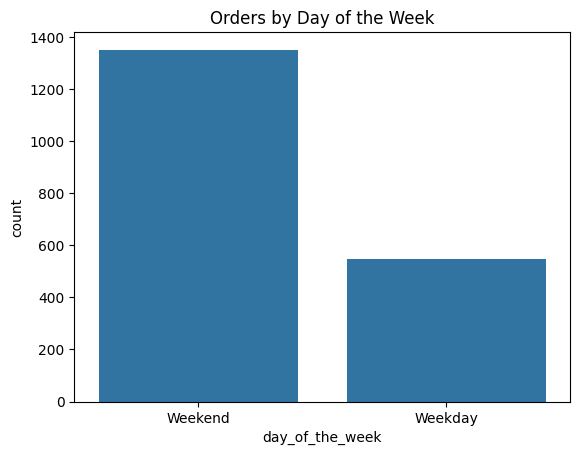

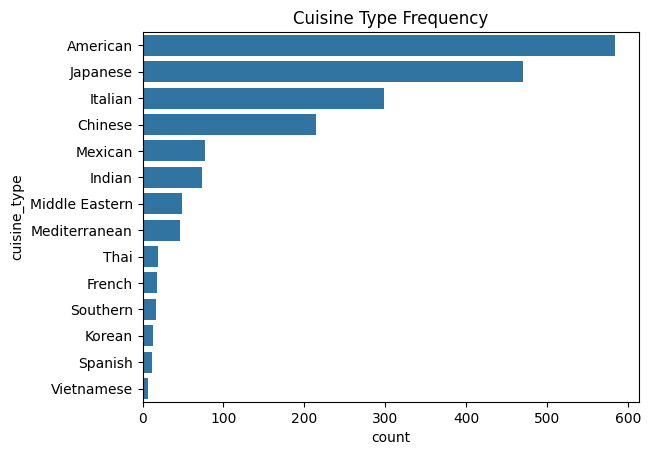

In [ ]:
# Write the code here
df1[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].hist(bins=15, figsize=(12, 6))

sns.histplot(df1['rating'], bins=10, kde=True)
plt.title('Customer Ratings Distribution')
plt.show()

sns.countplot(data=df1, x='day_of_the_week')
plt.title('Orders by Day of the Week')
plt.show()

sns.countplot(data=df1, y='cuisine_type', order=df1['cuisine_type'].value_counts().index)
plt.title('Cuisine Type Frequency')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

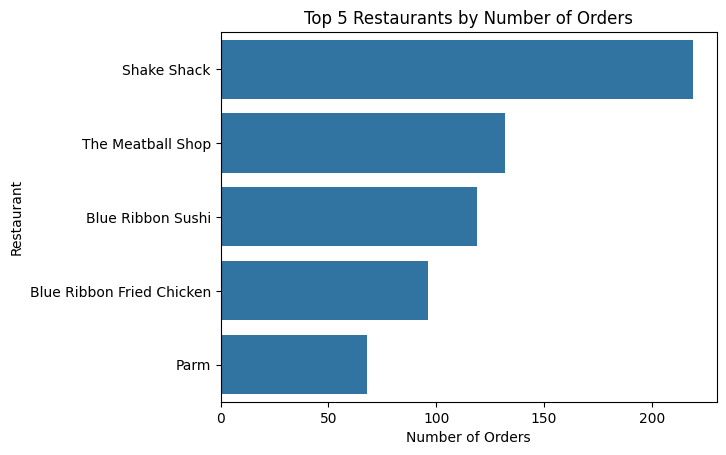

,restaurant_name
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


In [ ]:
# Write the code here
top_5_restaurants = df1['restaurant_name'].value_counts().head(5)

sns.countplot(data=df1[df1['restaurant_name'].isin(top_5_restaurants.index)],
y='restaurant_name',
order=top_5_restaurants.index)
plt.title('Top 5 Restaurants by Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Restaurant')
plt.show()

df1['restaurant_name'].value_counts().head(5)

#### Observations:
The American food chain resturants Shake Shack and The Meatball Shop came in the top two with 219 and 132 respectivly. This aligns with the bar graph "Cusine Type Frequency" showing American as the highest count overall.

---



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

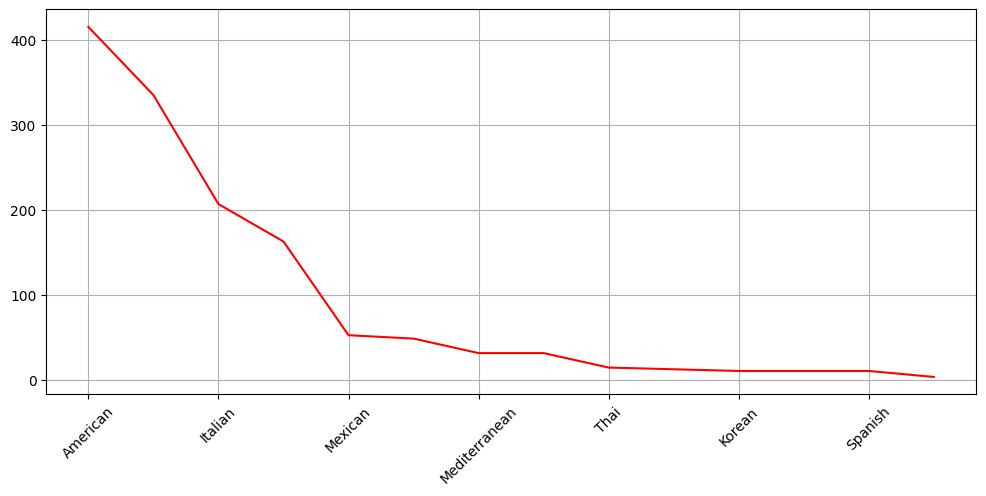

The most popular cuisine on weekends is American


In [ ]:
# Write the code here
df1[df1['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().plot(kind='line', color='red', figsize=(12, 5))

plt.xticks(rotation=45)
plt.grid(True)
plt.show()
popular_weekend = df1[df1['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().idxmax()

print(f"The most popular cuisine on weekends is {popular_weekend}")

#### Observations:
When specifing a query for the most popular cuisine on weekends I passed the following: In the data frame I asked for the category day of the week and filtered the weekend points in that data. Then I called for the cuisine type and useed the .value_counts() to count each type of that data. Finally I used .idxmax to find the highest counts in that filtered data. This was easier to visualize thus the .plot(kind='line') was used.

American leads the race on the weekends with 415. The "Cuisine Type Frequency"  graph for shows that the overll cusine type is American as the leader again with 584. This means that over 71.06% of the orders come in on the weekend.

---



### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

29.24% of orders cost more than $20


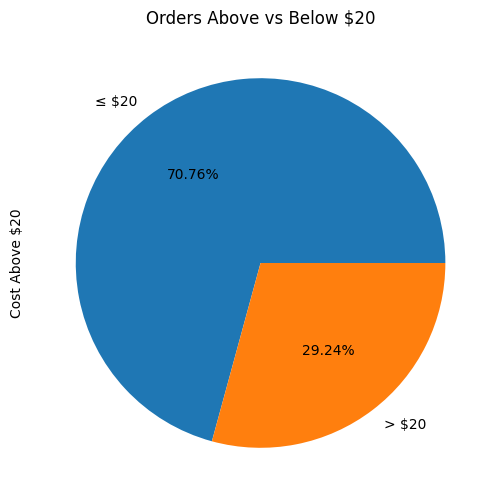

In [ ]:
# Write the code here
percent_above_20 = (df1[df1['cost_of_the_order'] > 20].shape[0] / df1.shape[0]) * 100

df1['Cost Above $20'] = df1['cost_of_the_order'] > 20

percentages = df1['Cost Above $20'].value_counts(normalize=True) * 100
percentages.index = ['≤ $20', '> $20']
percentages.plot(kind='pie', autopct='%.2f%%', figsize=(6, 6), title='Orders Above vs Below $20')

print(f"{percent_above_20:.2f}% of orders cost more than $20")

#### Observations:
When looking over the pie chart I can see that 29.24% or nearly one third of the customers are willing to spend above the $20 dollar threshold.

---



### **Question 10**: What is the mean order delivery time? [1 mark]

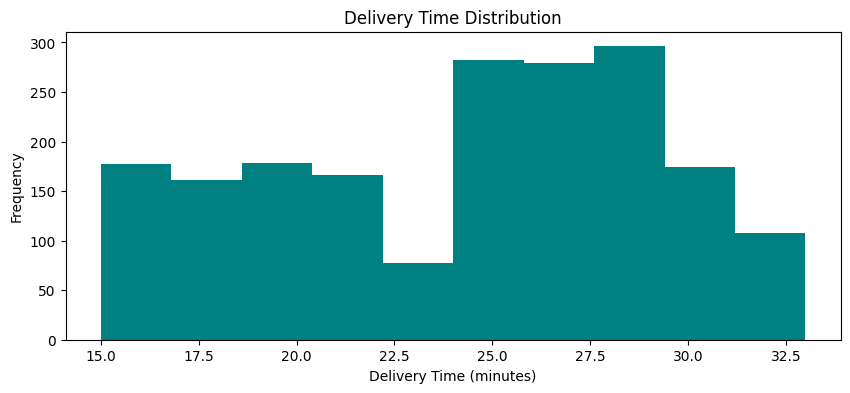

The mean order delivery time is 24.16 minutes


In [ ]:
# Write the code here
delivery_time_distribution = df1['delivery_time'].mean()

df1['delivery_time'].plot(kind='hist', color='teal', figsize=(10, 4))
plt.title('Delivery Time Distribution')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()

print(f"The mean order delivery time is {round(delivery_time_distribution, 2)} minutes")

#### Observations:
Although the mean delivery time is calculated and shown to be 24.16 minutes there is actually a discrepancy with this information. When I visualized the data using .plot(kind='hist') I can see that the mean is actually on the rising edge right after the lowest time point overall. This makes the data slighly right skewed as the delivery time is actually slightly longer than the mean would suggest being pulled down by some few fast deliveries.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

The average number of orders per customer is 1.58
Customer ID: 52832, Number of Orders: 13
Customer ID: 47440, Number of Orders: 10
Customer ID: 83287, Number of Orders: 9


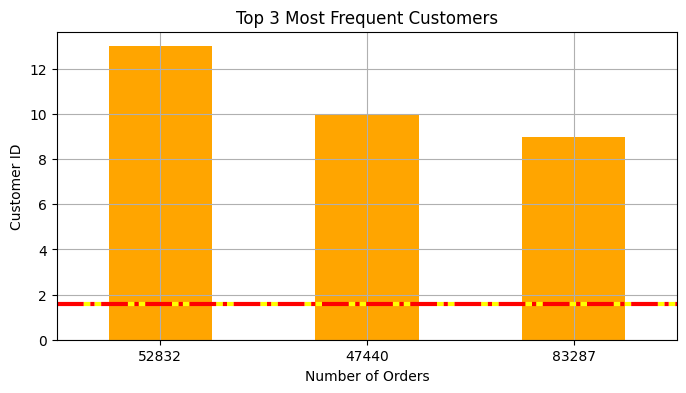

In [ ]:
# Write the code here
total_orders = df1.shape[0]
unique_customers = df1['customer_id'].nunique()
average_orders_per_customer = total_orders / unique_customers
print(f"The average number of orders per customer is {average_orders_per_customer:.2f}")

top_3_customers = df1['customer_id'].value_counts().head(3)
for customer_id, order_count in top_3_customers.items():
    print(f"Customer ID: {customer_id}, Number of Orders: {order_count}")


top_3_customers.plot(kind='bar', color='orange', figsize=(8, 4))
plt.axhline(y=average_orders_per_customer, color='red', gapcolor= 'yellow', linestyle='dashdot', linewidth=3)
plt.xlabel('Number of Orders')
plt.xticks(rotation=0)
plt.ylabel('Customer ID')
plt.title('Top 3 Most Frequent Customers')
plt.grid(True)
plt.show()

#### Observations:
Once I gathered the average using the aurguments for total_orders / unique_customers to get the average_orders_per_customer and sorted through for top_3_customers I could visualize the results. This clearly shows that the average orders per customers is 1.58 while the top three have 11.42 more orders with customer_id: 52832 = 13 orders. Further evaluation would be needed to verify if the orders where at any one location overall.

---



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


/tmp/ipython-input-1138718014.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df1.corr()
/tmp/ipython-input-1138718014.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".3f")


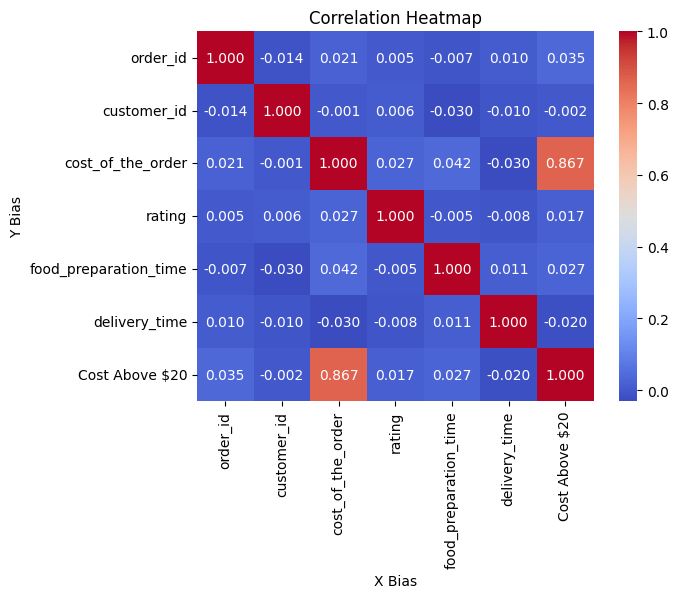

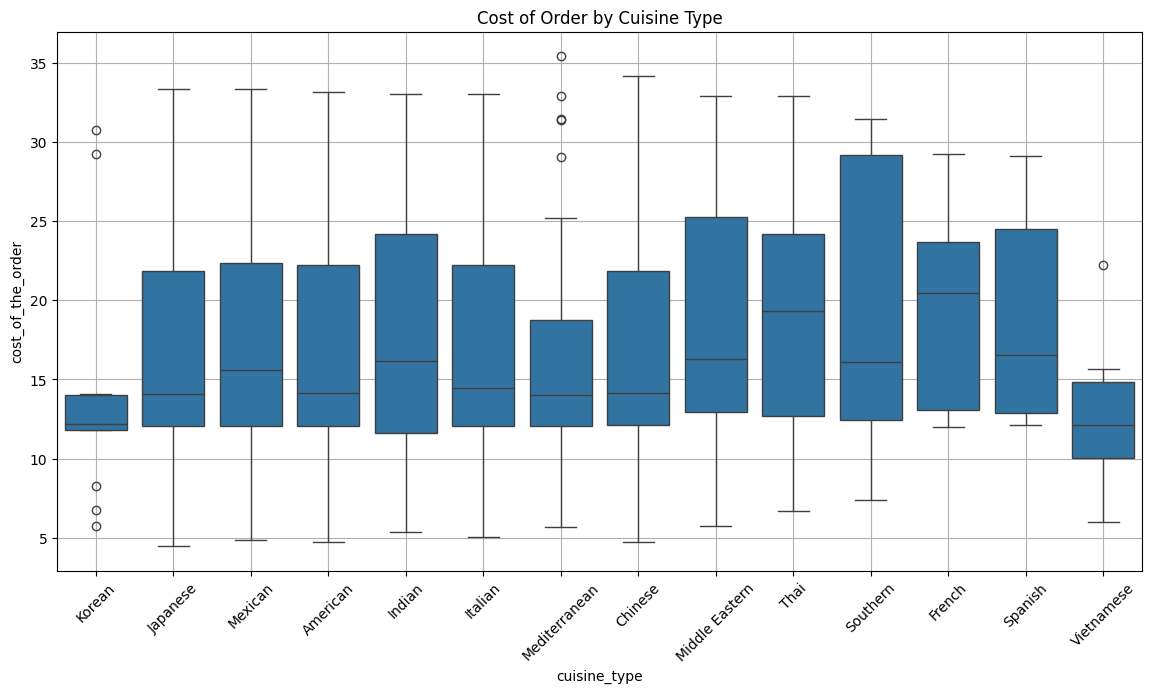

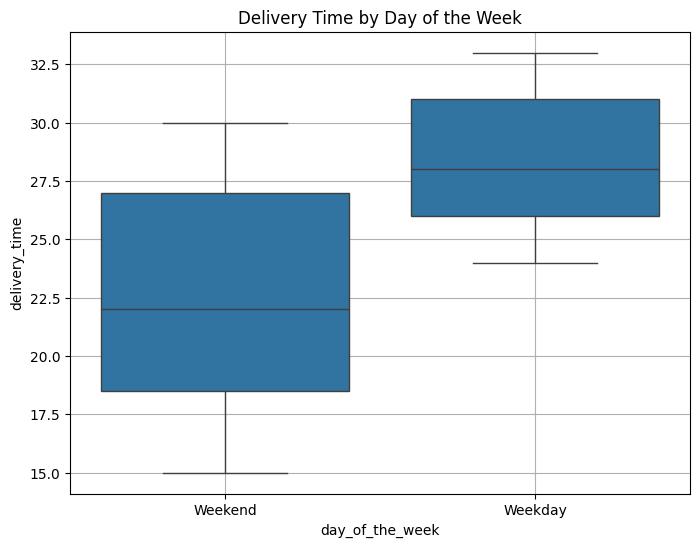

/tmp/ipython-input-1138718014.py:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time,Cost Above $20
order_id,1.00,-0.01,0.02,0.00,-0.01,0.01,0.03
customer_id,-0.01,1.00,-0.00,0.01,-0.03,-0.01,-0.00
cost_of_the_order,0.02,-0.00,1.00,0.03,0.04,-0.03,0.87
rating,0.00,0.01,0.03,1.00,-0.00,-0.01,0.02
food_preparation_time,-0.01,-0.03,0.04,-0.00,1.00,0.01,0.03
delivery_time,0.01,-0.01,-0.03,-0.01,0.01,1.00,-0.02
Cost Above $20,0.03,-0.00,0.87,0.02,0.03,-0.02,1.00


In [ ]:
# Write the code here
corr_matrix = df1.corr()

sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Heatmap')
plt.xlabel('X Bias')
plt.ylabel('Y Bias')
plt.show()

plt.figure(figsize=(14,7))
sns.boxplot(data=df1, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=45)
plt.title('Cost of Order by Cuisine Type')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(data=df1, x='day_of_the_week', y='delivery_time')
plt.title('Delivery Time by Day of the Week')
plt.grid(True)
plt.show()

df1.corr()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

Restaurants fulfilling the promotional offer: Index(['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Parm',
       'RedFarm Broadway', 'RedFarm Hudson', 'Shake Shack',
       'The Meatball Shop'],
      dtype='object', name='restaurant_name')
Number of restaurants fulfilling the promotional offer: 7


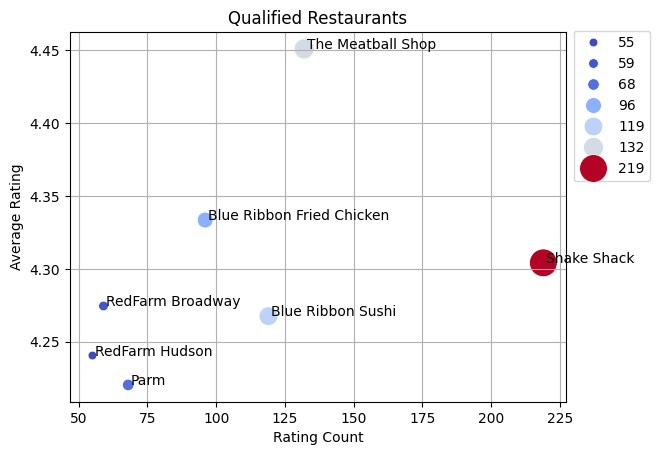

In [ ]:
# Write the code here
rating_counts = df1[~df1['rating'].isna()]['restaurant_name'].value_counts()
filtered_restaurants_names = rating_counts[rating_counts > 50].index
filtered_df = df1[df1['restaurant_name'].isin(filtered_restaurants_names)].copy()

average_ratings = filtered_df.groupby('restaurant_name')['rating'].mean()
qualified_restaurants = average_ratings[average_ratings > 4].index

plot_df = pd.DataFrame({
    'restaurant_name': qualified_restaurants,
    'rating_count': rating_counts[qualified_restaurants].values,
    'average_rating': average_ratings[qualified_restaurants].values

})

print(f"Restaurants fulfilling the promotional offer: {qualified_restaurants}")
print(f"Number of restaurants fulfilling the promotional offer: {len(qualified_restaurants)}")


sns.scatterplot(
    data=plot_df,
    x='rating_count',
    y='average_rating',
    size='rating_count',
    hue='rating_count',
    sizes=(40, 400),
    palette='coolwarm',
    legend='full'
)

for i in range(plot_df.shape[0]):
    plt.text(
        x=plot_df['rating_count'][i] + 1,
        y=plot_df['average_rating'][i],
        s=plot_df['restaurant_name'][i],
        fontsize=10
)

plt.title('Qualified Restaurants')
plt.xlabel('Rating Count')
plt.ylabel('Average Rating')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.8), borderaxespad=0.2)
plt.show()

#### Observations:
I started by running the filter arguement rating_counts to find all of the rows with values this was further refined by filtered_resturants_names to values > 50 then .index was used to exract the values. Created the variable filtered_df to check each value in filtered_resturants_names is in resturant_names and then created a .copy() for use. Then I found the average_ratings variable using groupby on the variables resturant_name and rating to find the .mean() at this point I created the variable qualified_resturants and found the average_ratings > 4 and then extracted them using .index for use. Then I created the plot_df data frame using these variables and printed and visualized the results.

From the results I can see that the qualifying resturants total 7 meeting the criteria requested. There is a variation in the rating count and the average score with Shake Shack counts at 219 and The Meatball Shack averages at approx. 4.45 making them stand outs. In contrast RedFarm Hudson and Parm have fewer overall ratings and counts but show a customer base worth investment.

---




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

/tmp/ipython-input-3298836293.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".3f")


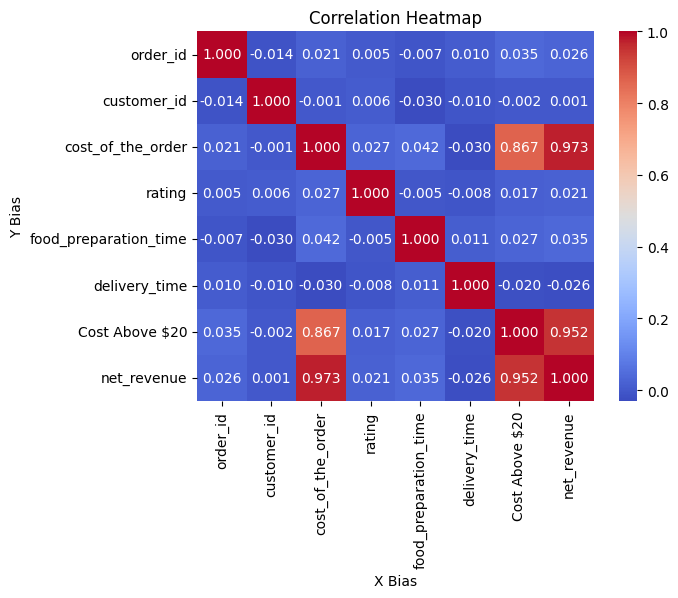

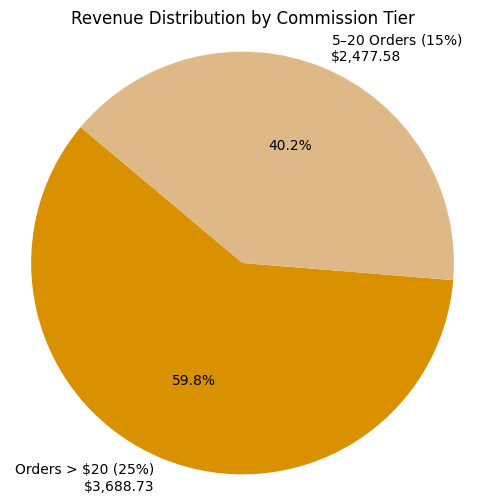

The net revenue generated by the company across all orders is $6166.30


In [ ]:
# Write the code here
df1['net_revenue'] = 0
df1.loc[df1['cost_of_the_order'] > 5, 'net_revenue'] = df1.loc[df1['cost_of_the_order'] > 5, 'cost_of_the_order'] * 0.15
df1.loc[df1['cost_of_the_order'] > 20, 'net_revenue'] = df1.loc[df1['cost_of_the_order'] > 20, 'cost_of_the_order'] * 0.25

tier_25 = df1['cost_of_the_order'] > 20
tier_15 = (df1['cost_of_the_order'] > 5) & (df1['cost_of_the_order'] <= 20)

revenue_25 = df1.loc[tier_25, 'net_revenue'].sum()
revenue_15 = df1.loc[tier_15, 'net_revenue'].sum()

sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Heatmap')
plt.xlabel('X Bias')
plt.ylabel('Y Bias')
plt.show()


labels = [f'Orders > $20 (25%)\n${revenue_25:,.2f}', f'$5–$20 Orders (15%)\n${revenue_15:,.2f}']
sizes = [revenue_25, revenue_15]
colors = ['#da9100', '#deb887']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Revenue Distribution by Commission Tier')
plt.axis('equal')
plt.show()

print(f"The net revenue generated by the company across all orders is ${df1['net_revenue'].sum():.2f}")

#### Observations:
First I created a new column net_revenue and set the values to 0 for each row. Then I passed the arguement all rows where cost_of_the_order > $5, update the net_revenue column by multiplying by 0.15 to calculate the revenue for the tier_15 filter. I performed the same steps for the tier_25 filter calculations which allowed me to create the revenue_15 and revenue_25 variables which create a list of the net_revenue for each and then finds the sum of each argument. Using the compliled data I was able to visualize and further evaluate.
This is further strengthened verification of the heatmap shown earlier now updated as the closest positive correlation was the net_revenue at 1.00 and the Cost Above 20 with 0.952 directly effecting it. This translate to a total revenue of 6,166.30 accross both tiers. Orders between 5 - 20 makes up 15% of all orders and accounts for 2477.58 of the total revenue. While orders > 20 make up 25% of all orders and accounts for 3,688.73 of total revenue.

---



### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

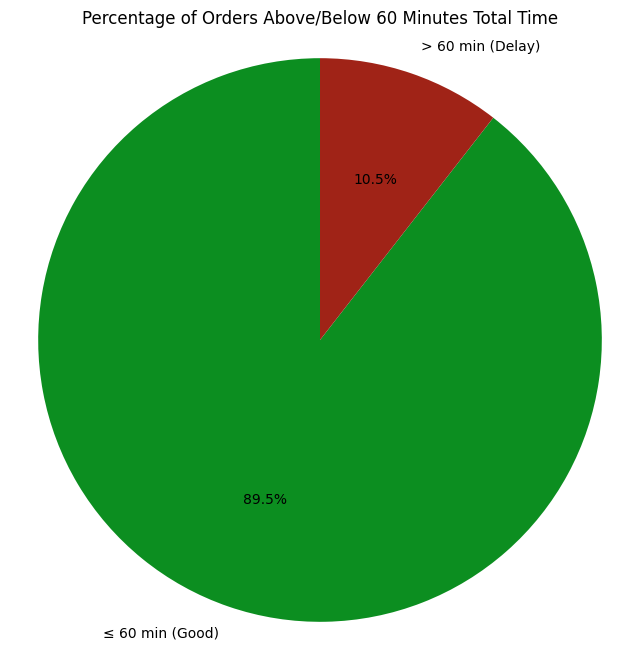

10.54% of orders take more than 60 minutes to be delivered from when order was placed


,total_time
count,1898.00
mean,51.53
std,6.83
min,35.00
25%,47.00
50%,52.00
75%,56.00
max,68.00


In [ ]:
# Write the code here
df1['total_time'] = df1['food_preparation_time'] + df1['delivery_time']

over_60 = df1['total_time'] > 60
over_60_percentage = over_60.mean() * 100

labels = ['≤ 60 min (Good)', '> 60 min (Delay)']
sizes = [
    100 - over_60_percentage,
    over_60_percentage
]
colors = ['#0c8e20', '#a02317']  # green = good, red = delay

plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title('Percentage of Orders Above/Below 60 Minutes Total Time')
plt.axis('equal')
plt.show()

print(f"{over_60_percentage:.2f}% of orders take more than 60 minutes to be delivered from when order was placed")
df1['total_time'].describe()

#### Observations:
I began by creating a new column total_time and filling it with the values from adding both columns food_preperation_time and delivery_time to give the total. Then I looked for how many where > 60 and stored in variable over_60 which then allowed me to create a variable over_50_percentage and find the mean of over_60 and multiply by 100 to get my percentage. From here I was able to visualize and further evaluate. This clearly shows that the while 10.5% of orders were > 60 minutes the overall 89.5% is a positive example of the company's delivery process.

---



### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

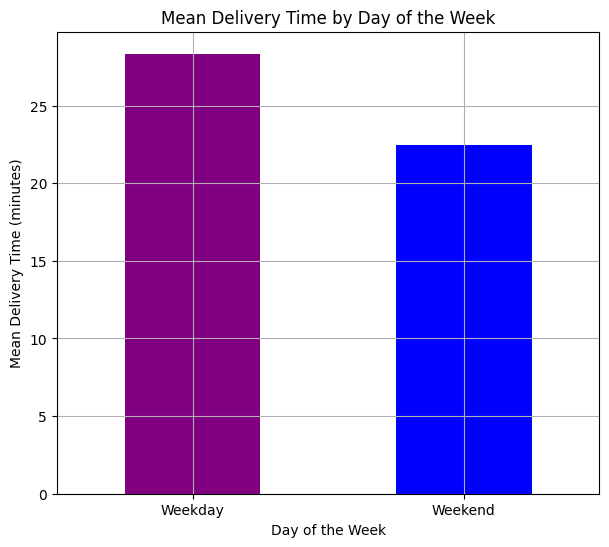

Mean for the delivery time by day of the week is as follows:
day_of_the_week
Weekday   28.34
Weekend   22.47
Name: delivery_time, dtype: float64


In [ ]:
# Write the code here
mean_delivery_time_by_day = df1['delivery_time'].groupby(df1['day_of_the_week']).mean()

mean_delivery_time_by_day.plot(kind='bar', color=['purple', 'blue'], figsize=(7, 6))
plt.title('Mean Delivery Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Delivery Time (minutes)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

print("Mean for the delivery time by day of the week is as follows:")
print(f'{mean_delivery_time_by_day}')

#### Observations:
I used groupby to be the values from the delivery_times by day_of_the_week and calculated the .mean() for each category. I then created a visualization and further evaluated. the insight allowed me to compare how average delivery time changes between weekdays 28.34 and weekends 22.47 each. That is almost a 6 minute improvement on weekends suggesting that deliveries are faster during the weekends overall.

---



### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
I went through every question and further reviewed the findings and based on what I found in the data a few things stand out.

*  Most of the orders (89.5%) were delivered in under 60 minutes which tells me the delivery process is working pretty efficiently overall.

*  Weekend deliveries are noticeably faster averaging around 22.47 minutes compared to 28.34 minutes on weekdays. That is a solid 6 minute difference  which could be tied to lower traffic, fewer orders, or better staffing.

*  American food leads across the board both in total orders and specifically on weekends. It is clearly what customers are ordering the most.

*  Shake Shack and The Meatball Shop are top performers. Not only do they have high order counts but their ratings are also strong which means they are popular and keeping customers happy.

*  Only 7 restaurants met the criteria of having more than 50 reviews and an average rating above 4. These are your high value reliable options.

*  In terms of revenue the company brought in a total of 6,166.30. Orders over 20 — which are charged a 25% commission made up nearly 60% of that amount. So bigger orders are driving the biggest revenue.

### Recommendations:
*  Focus the promos and marketing on those 7 high value restaurants especially Shake Shack and The Meatball Shop. They already bring in traffic and strong feedback so reward that momentum.

*  Keep leaning into American cuisine. It is clearly what most customers are ordering, so having more American style restaurants choices could boost customers or sales.

*  Look deeper into why weekend deliveries are faster if it is staffing or fewer orders maybe those same setups can be tested on slower weekdays to help reduce delivery time.

*  Encourage larger order sizes above 20 through promos. Since they bring in the majority of the revenue it makes sense to promote them more.

*  Flag restaurants that are underperforming in either rating or delivery time and offer training or tools. This keeps the overall quality up and improves customer experience across the board.

---